# Dependencies

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import requests, json
from pprint import pprint

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Reading Dataset

#### Elements

In [2]:
# base url for all FPL API endpoints
image_base = 'https://resources.premierleague.com/premierleague/photos/players/110x140/p'
base_url = 'https://fantasy.premierleague.com/api/'


# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()
pprint(r, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 7974990}


In [3]:
# team_info

teams_info = pd.json_normalize(r['teams'])
teams_info = teams_info.loc[:, (teams_info != teams_info.iloc[0]).any()]
teams_info = teams_info.rename(columns = {'name' : 'club_name'})
teams_info = teams_info[['code', 'id', 'club_name', 'strength', 'strength_overall_home','strength_overall_away',
                        'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
                         'strength_defence_away']]

teams_info.head()

code  id    club_name  strength  strength_overall_home  \
0     3   1      Arsenal         4                   1200   
1     7   2  Aston Villa         3                   1100   
2    94   3    Brentford         2                   1020   
3    36   4     Brighton         3                   1100   
4    90   5      Burnley         2                   1060   

   strength_overall_away  strength_attack_home  strength_attack_away  \
0                   1210                  1130                  1150   
1                   1160                  1120                  1140   
2                   1030                  1020                  1030   
3                   1130                  1150                  1190   
4                   1070                  1040                  1090   

   strength_defence_home  strength_defence_away  
0                   1220                   1210  
1                   1080                   1100  
2                   1020                   1030  
3                   1100                   1130  
4                   1040                   1080

In [4]:
# labels

pd.json_normalize(r['element_stats'])

label              name
0        Minutes played           minutes
1          Goals scored      goals_scored
2               Assists           assists
3          Clean sheets      clean_sheets
4        Goals conceded    goals_conceded
5             Own goals         own_goals
6       Penalties saved   penalties_saved
7      Penalties missed  penalties_missed
8          Yellow cards      yellow_cards
9             Red cards         red_cards
10                Saves             saves
11                Bonus             bonus
12  Bonus Points System               bps
13            Influence         influence
14           Creativity        creativity
15               Threat            threat
16            ICT Index         ict_index

In [5]:
# Players categories

player_cat = pd.json_normalize(r['element_types'])
player_cat = player_cat[['id', 'singular_name', 'squad_select', 
                         'squad_min_play', 'squad_max_play']]

player_cat

id singular_name  squad_select  squad_min_play  squad_max_play
0   1    Goalkeeper             2               1               1
1   2      Defender             5               3               5
2   3    Midfielder             5               2               5
3   4       Forward             3               1               3

In [6]:
# Players info

players =  pd.json_normalize(r['elements']).drop(['chance_of_playing_next_round', 'chance_of_playing_this_round','cost_change_event', 'cost_change_event_fall', 'cost_change_start',
                                      'cost_change_start_fall', 'ep_next', 'ep_this', 'event_points', 'id', 'news', 'news_added', 'special', 'squad_number',
                                      'team', 'corners_and_indirect_freekicks_order', 'direct_freekicks_order', 'penalties_order', 'corners_and_indirect_freekicks_text', 'direct_freekicks_text',
                                                  'penalties_text'], axis=1)

players.head()

code  dreamteam_count  element_type      first_name form  in_dreamteam  \
0   80201                0             1           Bernd  1.3         False   
1  115918                0             1      Rúnar Alex  0.0         False   
2   47431                0             3         Willian  0.0         False   
3   54694                0             4  Pierre-Emerick  0.7         False   
4   58822                0             2          Cédric  0.0         False   

   now_cost       photo points_per_game      second_name selected_by_percent  \
0        49   80201.jpg             1.3             Leno                 1.9   
1        40  115918.jpg             0.0        Rúnarsson                 1.2   
2        63   47431.jpg             0.0  Borges Da Silva                 0.1   
3        99   54694.jpg             1.0       Aubameyang                 2.1   
4        44   58822.jpg             0.0           Soares                 0.2   

  status  team_code  total_points  transfers_in  transfers_in_event  \
0      a          3             4         42479               34688   
1      u          3             0         19017                8732   
2      u          3             0           914                  50   
3      a          3             2        103651               90828   
4      a          3             0          7474                5394   

   transfers_out  transfers_out_event value_form value_season    web_name  \
0          76552                28386        0.3          0.8        Leno   
1          32077                19903        0.0          0.0   Rúnarsson   
2          17394                 3444        0.0          0.0     Willian   
3         166784                36849        0.1          0.2  Aubameyang   
4          11772                 5676        0.0          0.0      Cédric   

   minutes  goals_scored  assists  clean_sheets  goals_conceded  own_goals  \
0      270             0        0             0               9          0   
1        0             0        0             0               0          0   
2        0             0        0             0               0          0   
3       87             0        0             0               4          0   
4      180             0        0             0               7          0   

   penalties_saved  penalties_missed  yellow_cards  red_cards  saves  bonus  \
0                0                 0             0          0      9      0   
1                0                 0             0          0      0      0   
2                0                 0             0          0      0      0   
3                0                 0             0          0      0      0   
4                0                 0             1          0      0      0   

   bps influence creativity threat ict_index  influence_rank  \
0   48      79.0        0.0    0.0       7.9              41   
1    0       0.0        0.0    0.0       0.0             356   
2    0       0.0        0.0    0.0       0.0             584   
3    5       5.0        2.7   19.0       2.6             286   
4   16      21.4       21.8    0.0       4.3             202   

   influence_rank_type  creativity_rank  creativity_rank_type  threat_rank  \
0                    6              490                    51          464   
1                   34              345                    17          290   
2                  238              584                   239          581   
3                   31              253                    35          144   
4                   84              143                    35          324   

   threat_rank_type  ict_index_rank  ict_index_rank_type  
0                49             161                    7  
1                14             366                   34  
2               238             585                  239  
3                31             271                   34  
4               121             227                   80

In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code                  594 non-null    int64 
 1   dreamteam_count       594 non-null    int64 
 2   element_type          594 non-null    int64 
 3   first_name            594 non-null    object
 4   form                  594 non-null    object
 5   in_dreamteam          594 non-null    bool  
 6   now_cost              594 non-null    int64 
 7   photo                 594 non-null    object
 8   points_per_game       594 non-null    object
 9   second_name           594 non-null    object
 10  selected_by_percent   594 non-null    object
 11  status                594 non-null    object
 12  team_code             594 non-null    int64 
 13  total_points          594 non-null    int64 
 14  transfers_in          594 non-null    int64 
 15  transfers_in_event    594 non-null    in

# Data Preparation

In [8]:
# Aggregating name

players['full_name'] = players[['first_name', 'second_name']].agg(' '.join, axis=1)
players = players.drop(['first_name', 'second_name'], axis=1)
players.now_cost = players.now_cost/10 
players.photo = players.photo.str.split('.', expand=True)[0]
players.head()

code  dreamteam_count  element_type form  in_dreamteam  now_cost   photo  \
0   80201                0             1  1.3         False       4.9   80201   
1  115918                0             1  0.0         False       4.0  115918   
2   47431                0             3  0.0         False       6.3   47431   
3   54694                0             4  0.7         False       9.9   54694   
4   58822                0             2  0.0         False       4.4   58822   

  points_per_game selected_by_percent status  team_code  total_points  \
0             1.3                 1.9      a          3             4   
1             0.0                 1.2      u          3             0   
2             0.0                 0.1      u          3             0   
3             1.0                 2.1      a          3             2   
4             0.0                 0.2      a          3             0   

   transfers_in  transfers_in_event  transfers_out  transfers_out_event  \
0         42479               34688          76552                28386   
1         19017                8732          32077                19903   
2           914                  50          17394                 3444   
3        103651               90828         166784                36849   
4          7474                5394          11772                 5676   

  value_form value_season    web_name  minutes  goals_scored  assists  \
0        0.3          0.8        Leno      270             0        0   
1        0.0          0.0   Rúnarsson        0             0        0   
2        0.0          0.0     Willian        0             0        0   
3        0.1          0.2  Aubameyang       87             0        0   
4        0.0          0.0      Cédric      180             0        0   

   clean_sheets  goals_conceded  own_goals  penalties_saved  penalties_missed  \
0             0               9          0                0                 0   
1             0               0          0                0                 0   
2             0               0          0                0                 0   
3             0               4          0                0                 0   
4             0               7          0                0                 0   

   yellow_cards  red_cards  saves  bonus  bps influence creativity threat  \
0             0          0      9      0   48      79.0        0.0    0.0   
1             0          0      0      0    0       0.0        0.0    0.0   
2             0          0      0      0    0       0.0        0.0    0.0   
3             0          0      0      0    5       5.0        2.7   19.0   
4             1          0      0      0   16      21.4       21.8    0.0   

  ict_index  influence_rank  influence_rank_type  creativity_rank  \
0       7.9              41                    6              490   
1       0.0             356                   34              345   
2       0.0             584                  238              584   
3       2.6             286                   31              253   
4       4.3             202                   84              143   

   creativity_rank_type  threat_rank  threat_rank_type  ict_index_rank  \
0                    51          464                49             161   
1                    17          290                14             366   
2                   239          581               238             585   
3                    35          144                31             271   
4                    35          324               121             227   

   ict_index_rank_type                  full_name  
0                    7                 Bernd Leno  
1                   34       Rúnar Alex Rúnarsson  
2                  239    Willian Borges Da Silva  
3                   34  Pierre-Emerick Aubameyang  
4                   80              Cédric Soares

In [9]:
# Attaching teams_info to players

players = pd.merge(left = players,
         right = teams_info,
         left_on = 'team_code',
         right_on = 'code',
         suffixes=('_player', '_team')).drop(['team_code', 'code_team'] ,axis=1)

players.head()

code_player  dreamteam_count  element_type form  in_dreamteam  now_cost  \
0        80201                0             1  1.3         False       4.9   
1       115918                0             1  0.0         False       4.0   
2        47431                0             3  0.0         False       6.3   
3        54694                0             4  0.7         False       9.9   
4        58822                0             2  0.0         False       4.4   

    photo points_per_game selected_by_percent status  total_points  \
0   80201             1.3                 1.9      a             4   
1  115918             0.0                 1.2      u             0   
2   47431             0.0                 0.1      u             0   
3   54694             1.0                 2.1      a             2   
4   58822             0.0                 0.2      a             0   

   transfers_in  transfers_in_event  transfers_out  transfers_out_event  \
0         42479               34688          76552                28386   
1         19017                8732          32077                19903   
2           914                  50          17394                 3444   
3        103651               90828         166784                36849   
4          7474                5394          11772                 5676   

  value_form value_season    web_name  minutes  goals_scored  assists  \
0        0.3          0.8        Leno      270             0        0   
1        0.0          0.0   Rúnarsson        0             0        0   
2        0.0          0.0     Willian        0             0        0   
3        0.1          0.2  Aubameyang       87             0        0   
4        0.0          0.0      Cédric      180             0        0   

   clean_sheets  goals_conceded  own_goals  penalties_saved  penalties_missed  \
0             0               9          0                0                 0   
1             0               0          0                0                 0   
2             0               0          0                0                 0   
3             0               4          0                0                 0   
4             0               7          0                0                 0   

   yellow_cards  red_cards  saves  bonus  bps influence creativity threat  \
0             0          0      9      0   48      79.0        0.0    0.0   
1             0          0      0      0    0       0.0        0.0    0.0   
2             0          0      0      0    0       0.0        0.0    0.0   
3             0          0      0      0    5       5.0        2.7   19.0   
4             1          0      0      0   16      21.4       21.8    0.0   

  ict_index  influence_rank  influence_rank_type  creativity_rank  \
0       7.9              41                    6              490   
1       0.0             356                   34              345   
2       0.0             584                  238              584   
3       2.6             286                   31              253   
4       4.3             202                   84              143   

   creativity_rank_type  threat_rank  threat_rank_type  ict_index_rank  \
0                    51          464                49             161   
1                    17          290                14             366   
2                   239          581               238             585   
3                    35          144                31             271   
4                    35          324               121             227   

   ict_index_rank_type                  full_name  id club_name  strength  \
0                    7                 Bernd Leno   1   Arsenal         4   
1                   34       Rúnar Alex Rúnarsson   1   Arsenal         4   
2                  239    Willian Borges Da Silva   1   Arsenal         4   
3                   34  Pierre-Emerick Aubameyang   1   Arsenal         4   
4                   80      

In [10]:
# Attaching player category to players

players = pd.merge(left = players,
         right = player_cat,
         left_on = 'element_type',
         right_on = 'id',
         suffixes=('_player', '_player_type'),).drop(['element_type', 'id_player_type'] ,axis=1)

players.head()

code_player  dreamteam_count form  in_dreamteam  now_cost   photo  \
0        80201                0  1.3         False       4.9   80201   
1       115918                0  0.0         False       4.0  115918   
2       463748                0  0.0         False       4.0  463748   
3       225321                0  0.0         False       4.5  225321   
4       220682                0  0.0         False       4.0  220682   

  points_per_game selected_by_percent status  total_points  transfers_in  \
0             1.3                 1.9      a             4         42479   
1             0.0                 1.2      u             0         19017   
2             0.0                 0.5      a             0         29190   
3             0.0                 0.2      a             0         14865   
4             0.0                 0.1      a             0          6874   

   transfers_in_event  transfers_out  transfers_out_event value_form  \
0               34688          76552                28386        0.3   
1                8732          32077                19903        0.0   
2               21515           6409                 4896        0.0   
3               10032           5119                 4024        0.0   
4                6874           1558                 1558        0.0   

  value_season   web_name  minutes  goals_scored  assists  clean_sheets  \
0          0.8       Leno      270             0        0             0   
1          0.0  Rúnarsson        0             0        0             0   
2          0.0       Hein        0             0        0             0   
3          0.0   Ramsdale        0             0        0             0   
4          0.0    Okonkwo        0             0        0             0   

   goals_conceded  own_goals  penalties_saved  penalties_missed  yellow_cards  \
0               9          0                0                 0             0   
1               0          0                0                 0             0   
2               0          0                0                 0             0   
3               0          0                0                 0             0   
4               0          0                0                 0             0   

   red_cards  saves  bonus  bps influence creativity threat ict_index  \
0          0      9      0   48      79.0        0.0    0.0       7.9   
1          0      0      0    0       0.0        0.0    0.0       0.0   
2          0      0      0    0       0.0        0.0    0.0       0.0   
3          0      0      0    0       0.0        0.0    0.0       0.0   
4          0      0      0    0       0.0        0.0    0.0       0.0   

   influence_rank  influence_rank_type  creativity_rank  creativity_rank_type  \
0              41                    6              490                    51   
1             356                   34              345                    17   
2             376                   41              365                    24   
3             462                   59              456                    47   
4             363                   36              352                    19   

   threat_rank  threat_rank_type  ict_index_rank  ict_index_rank_type  \
0          464                49             161                    7   
1          290                14             366                   34   
2          313                21             386                   41   
3          421                45             468                   59   
4          297                16             373                   36   

              full_name  id_player club_name  strength  strength_overall_home  \
0            Bernd Leno          1   Arsenal         4                   1200   
1  Rúnar Alex Rúnarsson          1   Arsenal         4                   1200   
2             Karl Hein          1   Arsenal         4                   1200   
3        Aaron Ramsdale          1   Arsenal         

In [11]:
# next 3 fixtures

r = requests.get(base_url+'fixtures/').json()

matches = pd.json_normalize(r)
matches.kickoff_time = pd.to_datetime(matches.kickoff_time)

matches = matches[matches.kickoff_time>=pd.Timestamp.utcnow()][['event', 
                                                      'team_h', 'team_a', 'team_h_difficulty', 'team_a_difficulty']].head(30)

dict_team_name = dict()
for i in range(teams_info.shape[0]):
    dict_team_name[teams_info.loc[i, 'id']] = teams_info.loc[i, 'club_name']

matches.team_h = matches.team_h.map(dict_team_name) 
matches.team_a = matches.team_a.map(dict_team_name) 

team_home = matches.drop('team_a', axis=1)
team_home = team_home.rename(columns = {'team_h' : 'team'})
team_home['h_a'] = 'h'

team_away = matches.drop('team_h', axis=1)
team_away = team_away.rename(columns = {'team_a' : 'team'})
team_away['h_a'] = 'a'

fixture_next_3 = pd.concat([team_home, team_away],  axis=0).reset_index(drop=True)
fixture_next_3.head()

event            team  team_h_difficulty  team_a_difficulty h_a
0      4  Crystal Palace                  3                  2   h
1      4         Arsenal                  2                  3   h
2      4       Brentford                  2                  2   h
3      4       Leicester                  4                  3   h
4      4         Man Utd                  2                  4   h

In [12]:
# Next first

matches1 = matches[['event', 'team_h', 'team_a']].reset_index(drop=True)

next_first1 = pd.merge(left = fixture_next_3[fixture_next_3.event == fixture_next_3.event.min()],
         right = matches1[matches1.event == matches1.event.min()],
         left_on = 'team',
         right_on = 'team_h', how='inner').drop(['event_y', 'team_h'], axis=1)
next_first1 = next_first1.rename(columns = {'team_a':'next_1', 'event_x':'event'})



next_first2 = pd.merge(left = fixture_next_3[fixture_next_3.event == fixture_next_3.event.min()],
         right = matches1[matches1.event == matches1.event.min()],
         left_on = 'team',
         right_on = 'team_a', how='inner').drop(['event_y', 'team_a'], axis=1)
next_first2 = next_first2.rename(columns = {'team_h':'next_1', 'event_x':'event'})

next_first_final = pd.concat([next_first1, next_first2], axis=0).reset_index(drop=True)




# Next second

next_second1 = pd.merge(left = fixture_next_3[fixture_next_3.event == fixture_next_3.event.median()],
         right = matches1[matches1.event == matches1.event.median()],
         left_on = 'team',
         right_on = 'team_h', how='inner').drop(['event_y', 'team_h'], axis=1)
next_second1 = next_second1.rename(columns = {'team_a':'next_2', 'event_x':'event'})



next_second2 = pd.merge(left = fixture_next_3[fixture_next_3.event == fixture_next_3.event.median()],
         right = matches1[matches1.event == matches1.event.median()],
         left_on = 'team',
         right_on = 'team_a', how='inner').drop(['event_y', 'team_a'], axis=1)
next_second2 = next_second2.rename(columns = {'team_h':'next_2', 'event_x':'event'})

next_second_final = pd.concat([next_second1, next_second2], axis=0).reset_index(drop=True)




# Next Third

next_third1 = pd.merge(left = fixture_next_3[fixture_next_3.event == fixture_next_3.event.max()],
         right = matches1[matches1.event == matches1.event.max()],
         left_on = 'team',
         right_on = 'team_h', how='inner').drop(['event_y', 'team_h'], axis=1)
next_third1 = next_third1.rename(columns = {'team_a':'next_3', 'event_x':'event'})



next_third2 = pd.merge(left = fixture_next_3[fixture_next_3.event == fixture_next_3.event.max()],
         right = matches1[matches1.event == matches1.event.max()],
         left_on = 'team',
         right_on = 'team_a', how='inner').drop(['event_y', 'team_a'], axis=1)
next_third2 = next_third2.rename(columns = {'team_h':'next_3', 'event_x':'event'})

next_third_final = pd.concat([next_third1, next_third2], axis=0).reset_index(drop=True)



# merging Next 1 and 2

first_second = pd.merge(left = next_first_final,
         right = next_second_final,
         left_on = 'team',
         right_on = 'team',
         suffixes = ('_next_first', '_next_second'))



# merging all

next_three_all = pd.merge(left = first_second,
         right = next_third_final,
         left_on = 'team',
         right_on = 'team',
         suffixes = ('_next_first', '_next_third'))

next_three_all = next_three_all.rename(columns = {'event' : 'event_third',
                                                 'team_h_difficulty' : 'team_h_difficulty_third',
                                                 'team_a_difficulty' : 'team_a_difficulty_third',
                                                 'h_a' : 'h_a_third'})
next_three_all[['team', 'next_1', 'next_2', 'next_3']].head()

team     next_1     next_2       next_3
0  Crystal Palace      Spurs  Liverpool     Brighton
1         Arsenal    Norwich    Burnley        Spurs
2       Brentford   Brighton     Wolves    Liverpool
3       Leicester   Man City   Brighton      Burnley
4         Man Utd  Newcastle   West Ham  Aston Villa

In [13]:
players = pd.merge(left = players,
         right = next_three_all,
         left_on = 'club_name',
         right_on = 'team')


# Final dataset
players.head()

code_player  dreamteam_count form  in_dreamteam  now_cost   photo  \
0        80201                0  1.3         False       4.9   80201   
1       115918                0  0.0         False       4.0  115918   
2       463748                0  0.0         False       4.0  463748   
3       225321                0  0.0         False       4.5  225321   
4       220682                0  0.0         False       4.0  220682   

  points_per_game selected_by_percent status  total_points  transfers_in  \
0             1.3                 1.9      a             4         42479   
1             0.0                 1.2      u             0         19017   
2             0.0                 0.5      a             0         29190   
3             0.0                 0.2      a             0         14865   
4             0.0                 0.1      a             0          6874   

   transfers_in_event  transfers_out  transfers_out_event value_form  \
0               34688          76552                28386        0.3   
1                8732          32077                19903        0.0   
2               21515           6409                 4896        0.0   
3               10032           5119                 4024        0.0   
4                6874           1558                 1558        0.0   

  value_season   web_name  minutes  goals_scored  assists  clean_sheets  \
0          0.8       Leno      270             0        0             0   
1          0.0  Rúnarsson        0             0        0             0   
2          0.0       Hein        0             0        0             0   
3          0.0   Ramsdale        0             0        0             0   
4          0.0    Okonkwo        0             0        0             0   

   goals_conceded  own_goals  penalties_saved  penalties_missed  yellow_cards  \
0               9          0                0                 0             0   
1               0          0                0                 0             0   
2               0          0                0                 0             0   
3               0          0                0                 0             0   
4               0          0                0                 0             0   

   red_cards  saves  bonus  bps influence creativity threat ict_index  \
0          0      9      0   48      79.0        0.0    0.0       7.9   
1          0      0      0    0       0.0        0.0    0.0       0.0   
2          0      0      0    0       0.0        0.0    0.0       0.0   
3          0      0      0    0       0.0        0.0    0.0       0.0   
4          0      0      0    0       0.0        0.0    0.0       0.0   

   influence_rank  influence_rank_type  creativity_rank  creativity_rank_type  \
0              41                    6              490                    51   
1             356                   34              345                    17   
2             376                   41              365                    24   
3             462                   59              456                    47   
4             363                   36              352                    19   

   threat_rank  threat_rank_type  ict_index_rank  ict_index_rank_type  \
0          464                49             161                    7   
1          290                14             366                   34   
2          313                21             386                   41   
3          421                45             468                   59   
4          297                16             373                   36   

              full_name  id_player club_name  strength  strength_overall_home  \
0            Bernd Leno          1   Arsenal         4                   1200   
1  Rúnar Alex Rúnarsson          1   Arsenal         4                   1200   
2             Karl Hein          1   Arsenal         4                   1200   
3        Aaron Ramsdale          1   Arsenal         

# Data Checks

### 1. Transfer In-Out

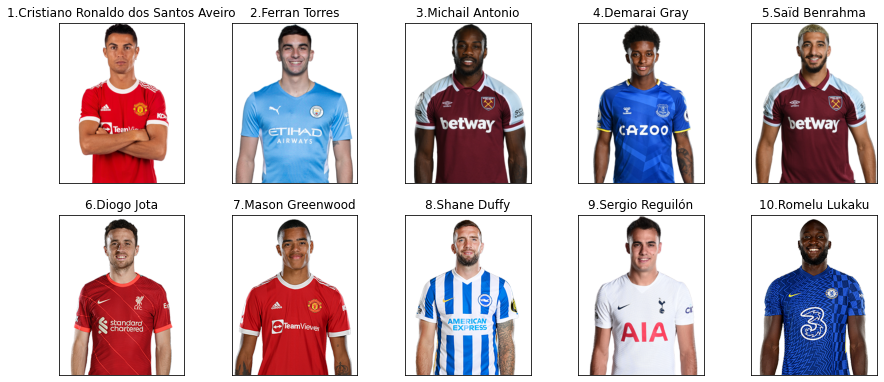

full_name  now_cost   photo influence creativity  \
0  Cristiano Ronaldo dos Santos Aveiro      12.5   14937       0.0        0.0   
1                        Ferran Torres       7.1  224444      88.4       23.5   
2                      Michail Antonio       8.0   57531     207.0       93.1   
3                         Demarai Gray       5.6  172632      94.4       56.0   
4                        Saïd Benrahma       6.4  172841     121.6       63.4   
5                           Diogo Jota       7.6  194634      87.2       33.0   
6                      Mason Greenwood       7.7  220688     112.6       64.8   
7                          Shane Duffy       4.2   61933     119.2        0.9   
8                      Sergio Reguilón       5.2  199249      43.4       47.0   
9                        Romelu Lukaku      11.5   66749      51.8       60.9   

  threat ict_index  minutes points_per_game selected_by_percent status  \
0    0.0       0.0        0             0.0                27.4      a   
1  137.0      24.9      240             7.7                15.8      a   
2  247.0      54.7      268            13.3                53.5      a   
3   68.0      21.9      244             6.3                 9.9      a   
4  107.0      29.2      264             8.7                32.0      a   
5  136.0      25.7      187             5.7                20.2      a   
6   89.0      26.6      269             8.7                18.2      a   
7  114.0      23.5      270             5.7                16.3      a   
8   12.0      10.3      270             7.3                13.5      a   
9  165.0      27.8      180             5.0                21.7      a   

   club_name          next_1          next_2          next_3  
0    Man Utd       Newcastle        West Ham     Aston Villa  
1   Man City       Leicester     Southampton         Chelsea  
2   West Ham     Southampton         Man Utd           Leeds  
3    Everton         Burnley     Aston Villa         Norwich  
4   West Ham     Southampton         Man Utd           Leeds  
5  Liverpool           Leeds  Crystal Palace       Brentford  
6    Man Utd       Newcastle        West Ham     Aston Villa  
7   Brighton       Brentford       Leicester  Crystal Palace  
8      Spurs  Crystal Palace         Chelsea         Arsenal  
9    Chelsea     Aston Villa           Spurs        Man City

In [14]:
# Top In

feaures_req = ['full_name', 'now_cost', 'photo', 'influence', 'creativity',
           'threat', 'ict_index', 'minutes',
           'points_per_game', 'selected_by_percent', 'status',
           'club_name', 'next_1', 'next_2', 'next_3']

output = players.sort_values(by = 'transfers_in_event',
                    axis = 0,
                    ascending  = False).head(10)[feaures_req].reset_index(drop =True)


plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

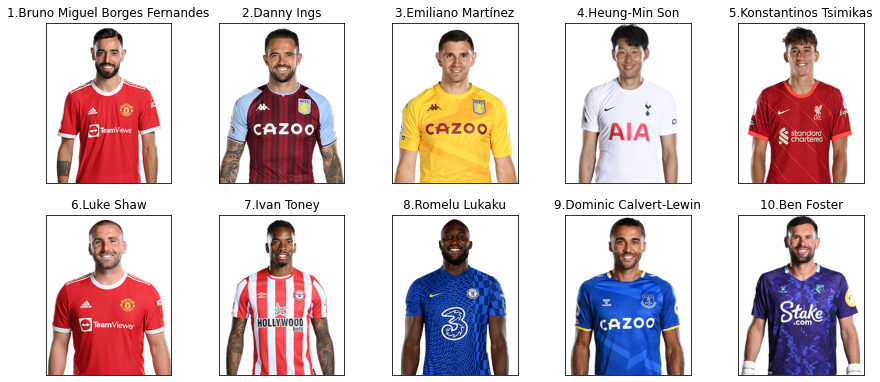

full_name  now_cost   photo influence creativity  \
0  Bruno Miguel Borges Fernandes      12.0  141746     125.0       91.9   
1                     Danny Ings       8.0   84939      89.0       15.6   
2              Emiliano Martínez       5.5   98980      50.2        0.0   
3                  Heung-Min Son      10.1   85971      77.6       57.1   
4          Konstantinos Tsimikas       4.1  214285      51.2       75.9   
5                      Luke Shaw       5.5  106760      26.0       81.2   
6                     Ivan Toney       6.4  144485      41.6       32.3   
7                  Romelu Lukaku      11.5   66749      51.8       60.9   
8          Dominic Calvert-Lewin       8.2  177815     118.4       39.8   
9                     Ben Foster       4.0    9089       0.0        0.0   

  threat ict_index  minutes points_per_game selected_by_percent status  \
0  111.0      32.8      270             7.7                41.8      a   
1   84.0      18.9      270             6.3                26.2      a   
2    0.0       5.0      270             3.0                17.5      n   
3  112.0      24.7      248             7.7                19.3      d   
4   39.0      16.6      184             6.0                22.2      a   
5    6.0      11.3      270             3.7                45.2      a   
6  103.0      17.7      270             3.3                17.6      a   
7  165.0      27.8      180             5.0                21.7      a   
8  178.0      33.7      248             7.7                14.6      d   
9    0.0       0.0        0             0.0                20.7      i   

     club_name          next_1          next_2       next_3  
0      Man Utd       Newcastle        West Ham  Aston Villa  
1  Aston Villa         Chelsea         Everton      Man Utd  
2  Aston Villa         Chelsea         Everton      Man Utd  
3        Spurs  Crystal Palace         Chelsea      Arsenal  
4    Liverpool           Leeds  Crystal Palace    Brentford  
5      Man Utd       Newcastle        West Ham  Aston Villa  
6    Brentford        Brighton          Wolves    Liverpool  
7      Chelsea     Aston Villa           Spurs     Man City  
8      Everton         Burnley     Aston Villa      Norwich  
9      Watford          Wolves         Norwich    Newcastle

In [15]:
# Top Out

output = players.sort_values(by = 'transfers_out_event',
                    axis = 0,
                    ascending  = False).head(10)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

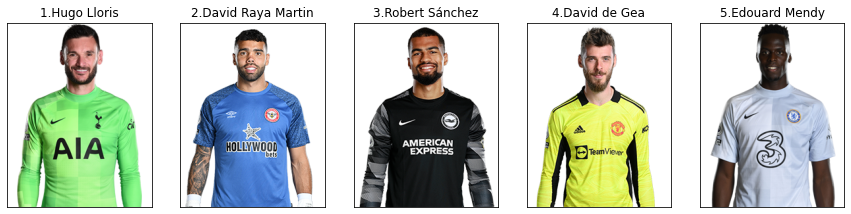

full_name  now_cost   photo influence creativity threat ict_index  \
0        Hugo Lloris       5.6   37915      93.8       10.0    0.0      10.4   
1  David Raya Martin       4.6  154561      86.6        0.0    0.0       8.6   
2     Robert Sánchez       4.5  215059      54.8       10.0    0.0       6.4   
3       David de Gea       5.0   51940      67.6        0.0    0.0       6.7   
4      Edouard Mendy       6.0  228286      73.6        0.0    0.0       7.3   

   minutes points_per_game selected_by_percent status  club_name  \
0      270             9.0                12.4      a      Spurs   
1      270             5.7                 9.9      a  Brentford   
2      270             3.3                25.0      a   Brighton   
3      270             4.0                 5.7      a    Man Utd   
4      270             5.7                11.8      a    Chelsea   

           next_1     next_2          next_3  
0  Crystal Palace    Chelsea         Arsenal  
1        Brighton     Wolves       Liverpool  
2       Brentford  Leicester  Crystal Palace  
3       Newcastle   West Ham     Aston Villa  
4     Aston Villa      Spurs        Man City

In [16]:
# GK In

output = players[players.singular_name == 'Goalkeeper'].sort_values(by = 'transfers_in_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

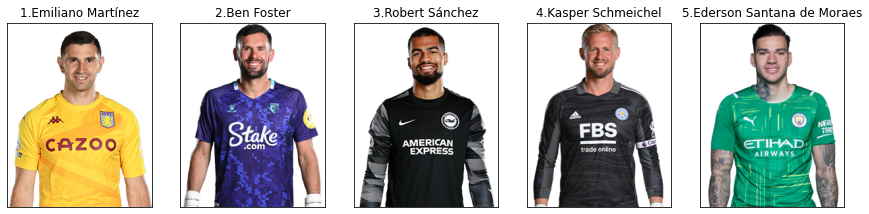

full_name  now_cost   photo influence creativity threat  \
0          Emiliano Martínez       5.5   98980      50.2        0.0    0.0   
1                 Ben Foster       4.0    9089       0.0        0.0    0.0   
2             Robert Sánchez       4.5  215059      54.8       10.0    0.0   
3          Kasper Schmeichel       5.0   17745      65.6        0.0    0.0   
4  Ederson Santana de Moraes       6.0  121160      16.2        0.0    0.0   

  ict_index  minutes points_per_game selected_by_percent status    club_name  \
0       5.0      270             3.0                17.5      n  Aston Villa   
1       0.0        0             0.0                20.7      i      Watford   
2       6.4      270             3.3                25.0      a     Brighton   
3       6.6      270             4.3                19.1      a    Leicester   
4       1.6      270             4.7                 9.6      a     Man City   

      next_1       next_2          next_3  
0    Chelsea      Everton         Man Utd  
1     Wolves      Norwich       Newcastle  
2  Brentford    Leicester  Crystal Palace  
3   Man City     Brighton         Burnley  
4  Leicester  Southampton         Chelsea

In [17]:
# GK Out

output = players[players.singular_name == 'Goalkeeper'].sort_values(by = 'transfers_out_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

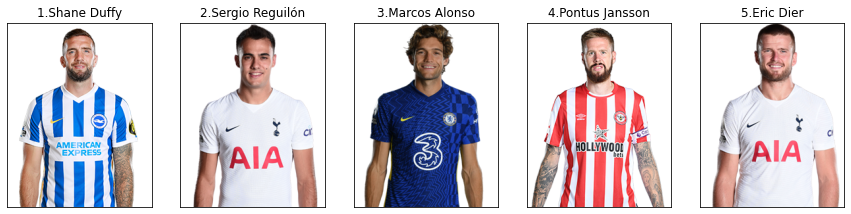

full_name  now_cost   photo influence creativity threat ict_index  \
0      Shane Duffy       4.2   61933     119.2        0.9  114.0      23.5   
1  Sergio Reguilón       5.2  199249      43.4       47.0   12.0      10.3   
2    Marcos Alonso       5.7   82263      99.6      105.1   39.0      24.5   
3   Pontus Jansson       4.6   61810      53.4       20.6    4.0       7.9   
4        Eric Dier       4.6   93264      62.8        1.2   42.0      10.6   

   minutes points_per_game selected_by_percent status  club_name  \
0      270             5.7                16.3      a   Brighton   
1      270             7.3                13.5      a      Spurs   
2      265             7.7                14.5      a    Chelsea   
3      270             7.3                 6.7      a  Brentford   
4      270             6.7                 9.1      a      Spurs   

           next_1     next_2          next_3  
0       Brentford  Leicester  Crystal Palace  
1  Crystal Palace    Chelsea         Arsenal  
2     Aston Villa      Spurs        Man City  
3        Brighton     Wolves       Liverpool  
4  Crystal Palace    Chelsea         Arsenal

In [18]:
# Defender In

output = players[players.singular_name == 'Defender'].sort_values(by = 'transfers_in_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

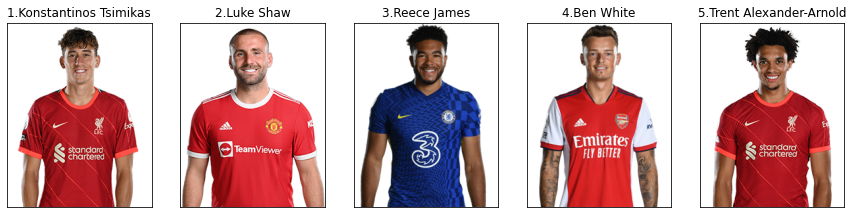

full_name  now_cost   photo influence creativity threat  \
0   Konstantinos Tsimikas       4.1  214285      51.2       75.9   39.0   
1               Luke Shaw       5.5  106760      26.0       81.2    6.0   
2             Reece James       5.6  225796      85.4       71.6   67.0   
3               Ben White       4.4  198869      10.8        0.5    0.0   
4  Trent Alexander-Arnold       7.5  169187      99.4      226.1   60.0   

  ict_index  minutes points_per_game selected_by_percent status  club_name  \
0      16.6      184             6.0                22.2      a  Liverpool   
1      11.3      270             3.7                45.2      a    Man Utd   
2      22.4      160             6.7                 6.8      s    Chelsea   
3       1.1       90             1.0                12.0      a    Arsenal   
4      38.6      270             7.3                33.9      a  Liverpool   

        next_1          next_2       next_3  
0        Leeds  Crystal Palace    Brentford  
1    Newcastle        West Ham  Aston Villa  
2  Aston Villa           Spurs     Man City  
3      Norwich         Burnley        Spurs  
4        Leeds  Crystal Palace    Brentford

In [19]:
# Defender Out

output = players[players.singular_name == 'Defender'].sort_values(by = 'transfers_out_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

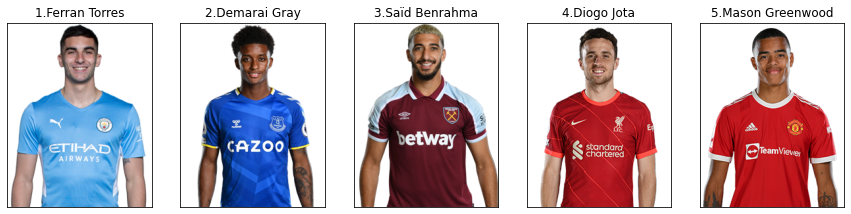

full_name  now_cost   photo influence creativity threat ict_index  \
0    Ferran Torres       7.1  224444      88.4       23.5  137.0      24.9   
1     Demarai Gray       5.6  172632      94.4       56.0   68.0      21.9   
2    Saïd Benrahma       6.4  172841     121.6       63.4  107.0      29.2   
3       Diogo Jota       7.6  194634      87.2       33.0  136.0      25.7   
4  Mason Greenwood       7.7  220688     112.6       64.8   89.0      26.6   

   minutes points_per_game selected_by_percent status  club_name       next_1  \
0      240             7.7                15.8      a   Man City    Leicester   
1      244             6.3                 9.9      a    Everton      Burnley   
2      264             8.7                32.0      a   West Ham  Southampton   
3      187             5.7                20.2      a  Liverpool        Leeds   
4      269             8.7                18.2      a    Man Utd    Newcastle   

           next_2       next_3  
0     Southampton      Chelsea  
1     Aston Villa      Norwich  
2         Man Utd        Leeds  
3  Crystal Palace    Brentford  
4        West Ham  Aston Villa

In [20]:
# Midfielder In

output = players[players.singular_name == 'Midfielder'].sort_values(by = 'transfers_in_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

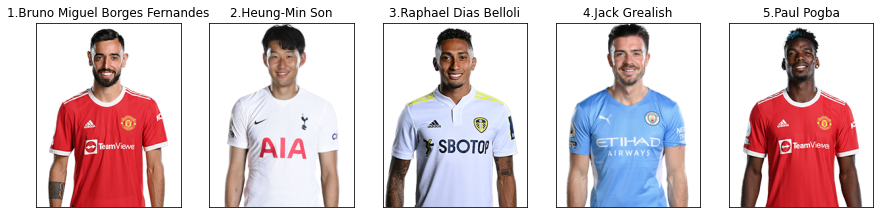

full_name  now_cost   photo influence creativity  \
0  Bruno Miguel Borges Fernandes      12.0  141746     125.0       91.9   
1                  Heung-Min Son      10.1   85971      77.6       57.1   
2           Raphael Dias Belloli       6.5  219961      64.4       73.9   
3                  Jack Grealish       8.0  114283      89.2      123.5   
4                     Paul Pogba       7.7   74208     108.6       98.8   

  threat ict_index  minutes points_per_game selected_by_percent status  \
0  111.0      32.8      270             7.7                41.8      a   
1  112.0      24.7      248             7.7                19.3      d   
2   88.0      22.7      270             3.3                14.9      a   
3  146.0      35.9      254             5.0                21.5      a   
4  102.0      31.0      254             7.3                19.1      a   

  club_name          next_1       next_2       next_3  
0   Man Utd       Newcastle     West Ham  Aston Villa  
1     Spurs  Crystal Palace      Chelsea      Arsenal  
2     Leeds       Liverpool    Newcastle     West Ham  
3  Man City       Leicester  Southampton      Chelsea  
4   Man Utd       Newcastle     West Ham  Aston Villa

In [21]:
# Midfielder Out

output = players[players.singular_name == 'Midfielder'].sort_values(by = 'transfers_out_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

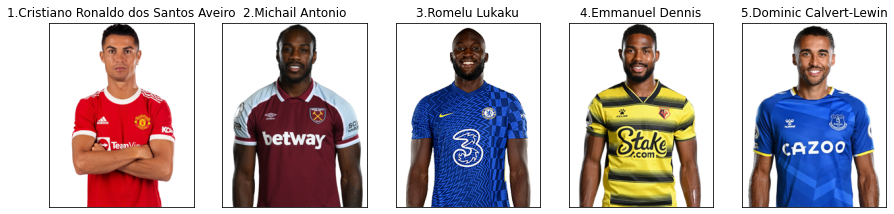

full_name  now_cost   photo influence creativity  \
0  Cristiano Ronaldo dos Santos Aveiro      12.5   14937       0.0        0.0   
1                      Michail Antonio       8.0   57531     207.0       93.1   
2                        Romelu Lukaku      11.5   66749      51.8       60.9   
3                      Emmanuel Dennis       5.2  230251      74.2       51.5   
4                Dominic Calvert-Lewin       8.2  177815     118.4       39.8   

  threat ict_index  minutes points_per_game selected_by_percent status  \
0    0.0       0.0        0             0.0                27.4      a   
1  247.0      54.7      268            13.3                53.5      a   
2  165.0      27.8      180             5.0                21.7      a   
3  132.0      25.8      245             5.0                 9.4      a   
4  178.0      33.7      248             7.7                14.6      d   

  club_name       next_1       next_2       next_3  
0   Man Utd    Newcastle     West Ham  Aston Villa  
1  West Ham  Southampton      Man Utd        Leeds  
2   Chelsea  Aston Villa        Spurs     Man City  
3   Watford       Wolves      Norwich    Newcastle  
4   Everton      Burnley  Aston Villa      Norwich

In [22]:
# Forward In

output = players[players.singular_name == 'Forward'].sort_values(by = 'transfers_in_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

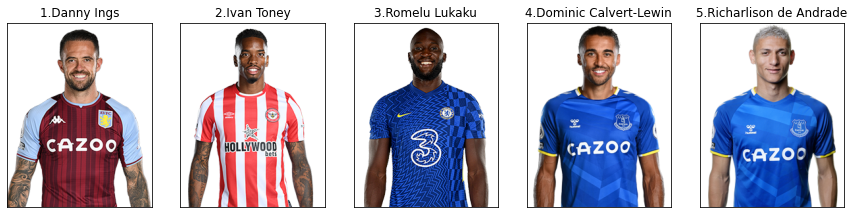

full_name  now_cost   photo influence creativity threat  \
0              Danny Ings       8.0   84939      89.0       15.6   84.0   
1              Ivan Toney       6.4  144485      41.6       32.3  103.0   
2           Romelu Lukaku      11.5   66749      51.8       60.9  165.0   
3   Dominic Calvert-Lewin       8.2  177815     118.4       39.8  178.0   
4  Richarlison de Andrade       7.5  212319      80.2       72.6   93.0   

  ict_index  minutes points_per_game selected_by_percent status    club_name  \
0      18.9      270             6.3                26.2      a  Aston Villa   
1      17.7      270             3.3                17.6      a    Brentford   
2      27.8      180             5.0                21.7      a      Chelsea   
3      33.7      248             7.7                14.6      d      Everton   
4      24.5      268             4.7                12.1      a      Everton   

        next_1       next_2     next_3  
0      Chelsea      Everton    Man Utd  
1     Brighton       Wolves  Liverpool  
2  Aston Villa        Spurs   Man City  
3      Burnley  Aston Villa    Norwich  
4      Burnley  Aston Villa    Norwich

In [23]:
# Forward Out

output = players[players.singular_name == 'Forward'].sort_values(by = 'transfers_out_event',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(output.shape[0]):
    plt.subplot((int(output.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + output.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + output.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

output

### 2. Top 11
(Without 3 players per team rule)

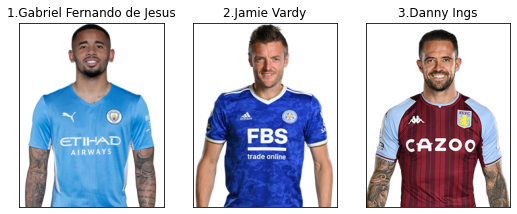

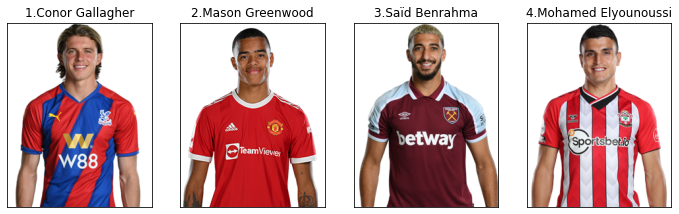

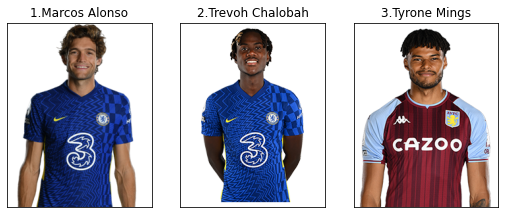

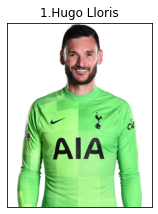

Points per player: 8.01


In [77]:
# 1. 3-4-3-1 formation

forwards = players[(players.singular_name == 'Forward') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(3)[feaures_req].reset_index(drop =True)

mid = players[(players.singular_name == 'Midfielder') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(4)[feaures_req].reset_index(drop =True)

defe = players[(players.singular_name == 'Defender') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(3)[feaures_req].reset_index(drop =True)

goalk = players[(players.singular_name == 'Goalkeeper') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(forwards.shape[0]):
    plt.subplot((int(forwards.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + forwards.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + forwards.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(mid.shape[0]):
    plt.subplot((int(mid.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + mid.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + mid.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(defe.shape[0]):
    plt.subplot((int(defe.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + defe.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + defe.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(goalk.shape[0]):
    plt.subplot((int(goalk.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + goalk.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + goalk.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()


print('Points per player:', round((forwards.points_per_game.astype('float64').mean() + 
 mid.points_per_game.astype('float64').mean() + 
 defe.points_per_game.astype('float64').mean() + 
 goalk.points_per_game.astype('float64').mean())/4, 2))

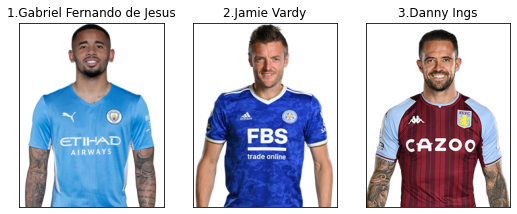

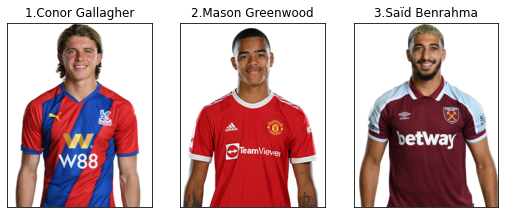

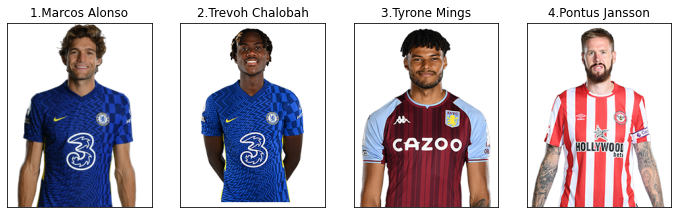

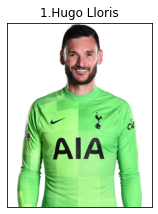

Points per player: 8.04


In [78]:
# 2. 3-3-4-1 formation

forwards = players[(players.singular_name == 'Forward') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(3)[feaures_req].reset_index(drop =True)

mid = players[(players.singular_name == 'Midfielder') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(3)[feaures_req].reset_index(drop =True)

defe = players[(players.singular_name == 'Defender') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(4)[feaures_req].reset_index(drop =True)

goalk = players[(players.singular_name == 'Goalkeeper') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(forwards.shape[0]):
    plt.subplot((int(forwards.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + forwards.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + forwards.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(mid.shape[0]):
    plt.subplot((int(mid.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + mid.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + mid.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(defe.shape[0]):
    plt.subplot((int(defe.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + defe.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + defe.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(goalk.shape[0]):
    plt.subplot((int(goalk.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + goalk.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + goalk.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

print('Points per player:', round((forwards.points_per_game.astype('float64').mean() + 
 mid.points_per_game.astype('float64').mean() + 
 defe.points_per_game.astype('float64').mean() + 
 goalk.points_per_game.astype('float64').mean())/4, 2))

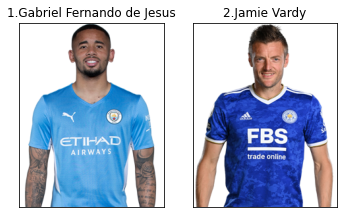

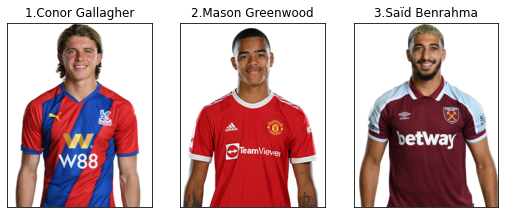

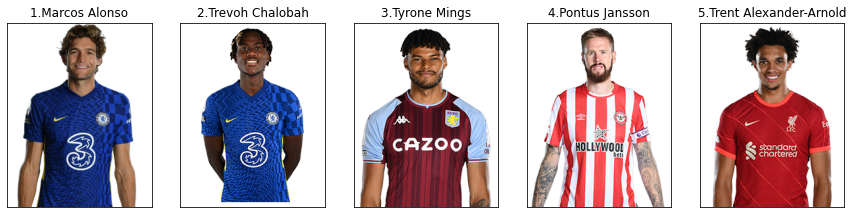

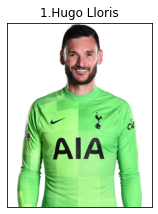

Points per player: 8.1


In [79]:
# 3. 2-3-5-1 formation

forwards = players[(players.singular_name == 'Forward') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(2)[feaures_req].reset_index(drop =True)

mid = players[(players.singular_name == 'Midfielder') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(3)[feaures_req].reset_index(drop =True)

defe = players[(players.singular_name == 'Defender') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

goalk = players[(players.singular_name == 'Goalkeeper') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(forwards.shape[0]):
    plt.subplot((int(forwards.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + forwards.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + forwards.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(mid.shape[0]):
    plt.subplot((int(mid.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + mid.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + mid.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(defe.shape[0]):
    plt.subplot((int(defe.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + defe.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + defe.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(goalk.shape[0]):
    plt.subplot((int(goalk.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + goalk.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + goalk.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

print('Points per player:', round((forwards.points_per_game.astype('float64').mean() + 
 mid.points_per_game.astype('float64').mean() + 
 defe.points_per_game.astype('float64').mean() + 
 goalk.points_per_game.astype('float64').mean())/4, 2))

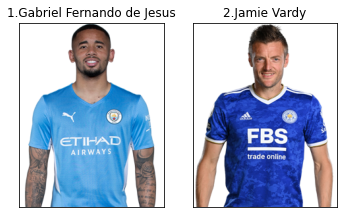

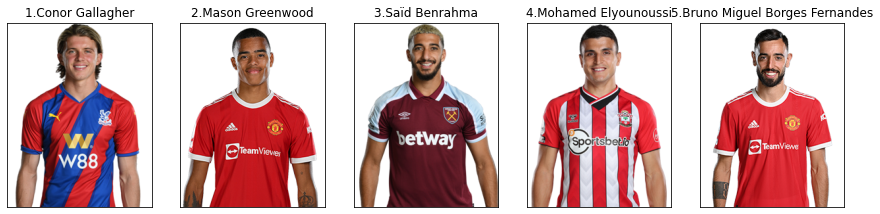

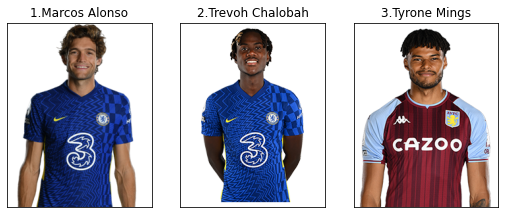

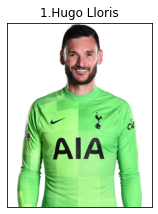

Points per player: 8.03


In [80]:
# 4. 2-5-3-1 formation

forwards = players[(players.singular_name == 'Forward') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(2)[feaures_req].reset_index(drop =True)

mid = players[(players.singular_name == 'Midfielder') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

defe = players[(players.singular_name == 'Defender') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(3)[feaures_req].reset_index(drop =True)

goalk = players[(players.singular_name == 'Goalkeeper') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(forwards.shape[0]):
    plt.subplot((int(forwards.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + forwards.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + forwards.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(mid.shape[0]):
    plt.subplot((int(mid.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + mid.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + mid.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(defe.shape[0]):
    plt.subplot((int(defe.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + defe.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + defe.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(goalk.shape[0]):
    plt.subplot((int(goalk.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + goalk.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + goalk.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()


print('Points per player:', round((forwards.points_per_game.astype('float64').mean() + 
 mid.points_per_game.astype('float64').mean() + 
 defe.points_per_game.astype('float64').mean() + 
 goalk.points_per_game.astype('float64').mean())/4, 2))

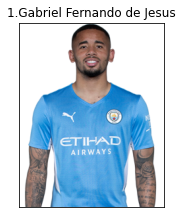

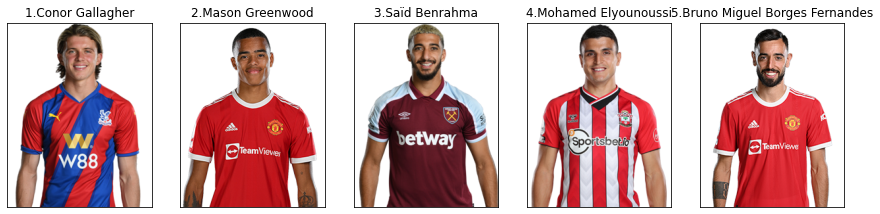

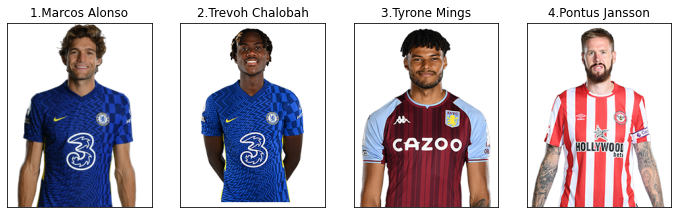

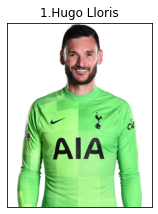

Points per player: 8.23


In [81]:
# 5. 1-5-4-1 formation

forwards = players[(players.singular_name == 'Forward') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

mid = players[(players.singular_name == 'Midfielder') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

defe = players[(players.singular_name == 'Defender') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(4)[feaures_req].reset_index(drop =True)

goalk = players[(players.singular_name == 'Goalkeeper') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(forwards.shape[0]):
    plt.subplot((int(forwards.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + forwards.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + forwards.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(mid.shape[0]):
    plt.subplot((int(mid.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + mid.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + mid.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(defe.shape[0]):
    plt.subplot((int(defe.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + defe.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + defe.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(goalk.shape[0]):
    plt.subplot((int(goalk.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + goalk.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + goalk.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()


print('Points per player:', round((forwards.points_per_game.astype('float64').mean() + 
 mid.points_per_game.astype('float64').mean() + 
 defe.points_per_game.astype('float64').mean() + 
 goalk.points_per_game.astype('float64').mean())/4, 2))

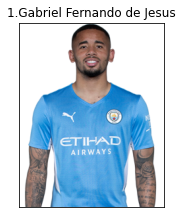

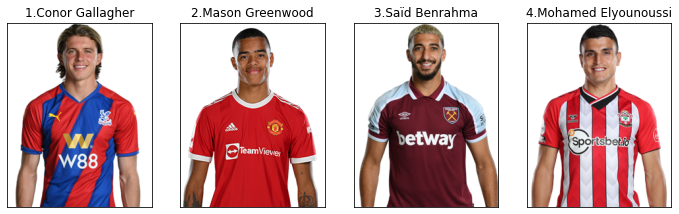

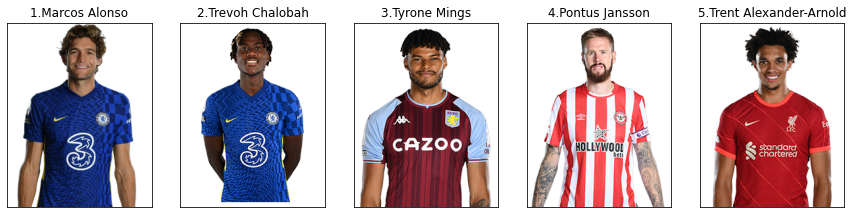

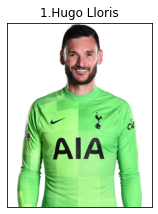

Points per player: 8.27


In [82]:
# 6. 1-4-5-1 formation

forwards = players[(players.singular_name == 'Forward') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

mid = players[(players.singular_name == 'Midfielder') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(4)[feaures_req].reset_index(drop =True)

defe = players[(players.singular_name == 'Defender') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(5)[feaures_req].reset_index(drop =True)

goalk = players[(players.singular_name == 'Goalkeeper') & (players.status == 'a')].sort_values(by = 'points_per_game',
                    axis = 0,
                    ascending  = False).head(1)[feaures_req].reset_index(drop =True)

plt.subplots(figsize=(15, 10))
for i in range(forwards.shape[0]):
    plt.subplot((int(forwards.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + forwards.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + forwards.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(mid.shape[0]):
    plt.subplot((int(mid.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + mid.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + mid.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(defe.shape[0]):
    plt.subplot((int(defe.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + defe.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + defe.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()

plt.subplots(figsize=(15, 10))
for i in range(goalk.shape[0]):
    plt.subplot((int(goalk.shape[0]/5)+1), 5, i+1)
    img = mpimg.imread(image_base + goalk.loc[i, 'photo'] + '.png')
    imgplot = plt.imshow(img)
    plt.title(str(i+1)+ '.' + goalk.loc[i, 'full_name'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    
plt.show()


print('Points per player:', round((forwards.points_per_game.astype('float64').mean() + 
 mid.points_per_game.astype('float64').mean() + 
 defe.points_per_game.astype('float64').mean() + 
 goalk.points_per_game.astype('float64').mean())/4, 2))

### 3. Most Selected

In [103]:
players.selected_by_percent = players.selected_by_percent.astype('float64')
players.sort_values('selected_by_percent', ascending=False)[feaures_req].head(10).reset_index(drop=True)

full_name  now_cost   photo influence creativity  \
0                        Mohamed Salah      12.5  118748     123.8      107.6   
1                      Michail Antonio       8.0   57531     207.0       93.1   
2                            Luke Shaw       5.5  106760      26.0       81.2   
3        Bruno Miguel Borges Fernandes      12.0  141746     125.0       91.9   
4               Trent Alexander-Arnold       7.5  169187      99.4      226.1   
5                        Saïd Benrahma       6.4  172841     121.6       63.4   
6  Cristiano Ronaldo dos Santos Aveiro      12.5   14937       0.0        0.0   
7                           Danny Ings       8.0   84939      89.0       15.6   
8         Rúben Santos Gato Alves Dias       6.0  171314      74.4       55.7   
9                       Robert Sánchez       4.5  215059      54.8       10.0   

  threat ict_index  minutes points_per_game  selected_by_percent status  \
0  196.0      42.8      270            10.0                 54.1      a   
1  247.0      54.7      268            13.3                 53.5      a   
2    6.0      11.3      270             3.7                 45.2      a   
3  111.0      32.8      270             7.7                 41.8      a   
4   60.0      38.6      270             7.3                 33.9      a   
5  107.0      29.2      264             8.7                 32.0      a   
6    0.0       0.0        0             0.0                 27.4      a   
7   84.0      18.9      270             6.3                 26.2      a   
8    4.0      13.4      270             6.3                 26.1      a   
9    0.0       6.4      270             3.3                 25.0      a   

     club_name       next_1          next_2          next_3  
0    Liverpool        Leeds  Crystal Palace       Brentford  
1     West Ham  Southampton         Man Utd           Leeds  
2      Man Utd    Newcastle        West Ham     Aston Villa  
3      Man Utd    Newcastle        West Ham     Aston Villa  
4    Liverpool        Leeds  Crystal Palace       Brentford  
5     West Ham  Southampton         Man Utd           Leeds  
6      Man Utd    Newcastle        West Ham     Aston Villa  
7  Aston Villa      Chelsea         Everton         Man Utd  
8     Man City    Leicester     Southampton         Chelsea  
9     Brighton    Brentford       Leicester  Crystal Palace